In [18]:
pip install git+https://github.com/ubod/pyMLaux.git

  Cloning https://github.com/ubod/pyMLaux.git to /tmp/pip-req-build-hupzsbv6
  Running command git clone --filter=blob:none --quiet https://github.com/ubod/pyMLaux.git /tmp/pip-req-build-hupzsbv6
  Resolved https://github.com/ubod/pyMLaux.git to commit bf7c7e39ae37cb55c6fd06dca3ae7d53f4a82086
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [19]:
from pyMLaux import plot_history

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/azureuser/cloudfiles/code/Users/p42561/Ex07/G1/energydata_complete.csv")
df['date_time'] = pd.to_datetime(df['date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  object        
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df['dayinweek']= df['date_time'].dt.day_of_week
df['month'] = df['date_time'].dt.month
df['hour'] = df["date_time"].dt.hour
df['minutes'] = df['date_time'].dt.minute
df.drop(columns=['date_time'],inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Appliances","date"]),df['Appliances'])
print(X_train.shape, X_test.shape)

(14801, 31) (4934, 31)


In [23]:
sd = StandardScaler()
X_train_scaled = sd.fit_transform(X_train)
X_test_scaled = sd.transform(X_test)

In [9]:
import tensorflow as tf

2025-11-26 13:07:57.298635: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764162477.319368  132436 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764162477.325767  132436 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764162477.341662  132436 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764162477.341695  132436 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764162477.341698  132436 computation_placer.cc:177] computation placer alr

In [13]:
model = tf.keras.models.Sequential([
    #input
    tf.keras.layers.Input(shape=(x_train_scaled.shape[1],)),
    #hidden layers
    tf.keras.layers.Dense(200,activation="sigmoid"),
    tf.keras.layers.Dense(200,activation="sigmoid"),
    #output
    tf.keras.layers.Dense(1,activation=None)
])

model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 200)            │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,801 (182.82 KB)

 Trainable params: 46,801 (182.82 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[callback]
    )

Epoch 1/100


370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10567.5283 - mae: 49.0137 - val_loss: 11189.7168 - val_mae: 51.4919
Epoch 2/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9955.5537 - mae: 49.2817 - val_loss: 10390.3066 - val_mae: 50.1507
Epoch 3/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8593.0508 - mae: 48.6079 - val_loss: 10174.5615 - val_mae: 52.9036
Epoch 4/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9578.9766 - mae: 52.9501 - val_loss: 10116.7832 - val_mae: 53.2861
Epoch 5/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9583.8555 - mae: 54.2770 - val_loss: 10095.7793 - val_mae: 52.5302
Epoch 6/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8361.8779 - mae: 50.4441 - val_loss: 10046.1152 - val_mae: 53.9122
Epoch 7/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9188.8477 - mae: 53.1278 - val_loss: 9957.1191 - val_mae: 52.7726
Epoch 8/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9190.1885 - mae: 53.7392 - val_loss: 9908.4727 - val_ma

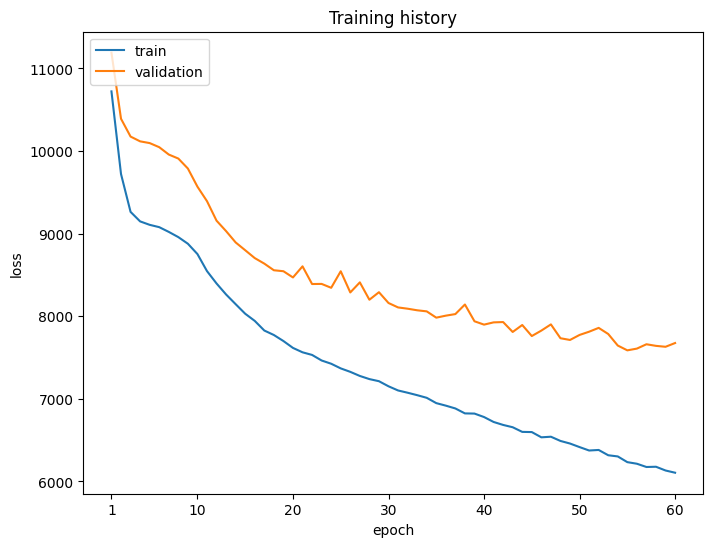

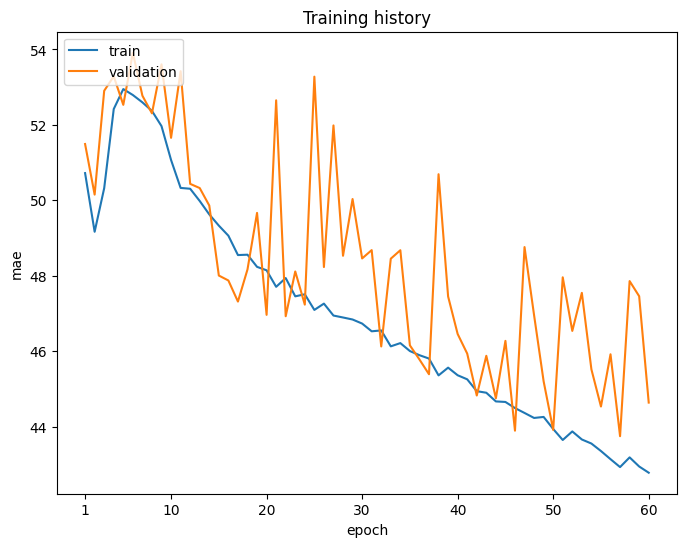

In [20]:
plot_history(history=history,measure="mae")

In [24]:
test_loss, test_mae = model.evaluate(X_test_scaled,y_test)

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7282.3755 - mae: 45.6264


In [25]:
print(test_mae)

45.666282653808594


In [26]:
import matplotlib.pyplot as plt

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


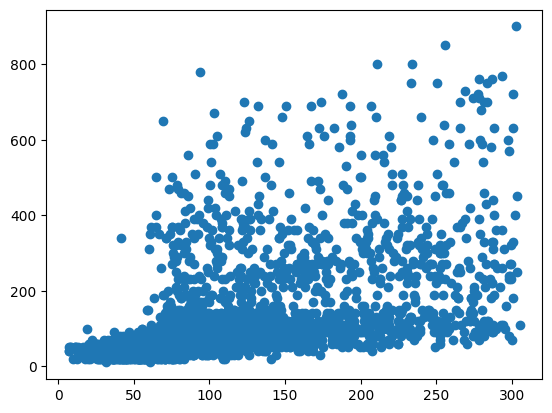

In [27]:
prediction = model.predict(X_test_scaled)
plt.scatter(prediction, y_test)